<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Boston_House_price_predict_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏡 Boston Housing Price Prediction: A Linear Regression Approach

## Project Overview
This project explores how different factors affect housing prices in Boston, Massachusetts. Using the well-known Boston Housing Dataset, **Linear Regression** model is applied to identify what drives changes in home values and to create a tool that can predict median house prices with greater insight.

## Dataset
The **Boston Housing Dataset** contains socio-economic data collected by the U.S. Census Service. It comprises 14 features for 506 different housing tracts, including:
* `CRIM` - per capita crime rate by town

* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.

* `INDUS` - proportion of non-retail business acres per town.

* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* `NOX` - nitric oxides concentration (parts per 10 million)

* `RM` - average number of rooms per dwelling

* `AGE` - proportion of owner-occupied units built prior to 1940

* `DIS` - weighted distances to five Boston employment centres

* `RAD` - index of accessibility to radial highways

* `TAX` - full-value property-tax rate per $10,000

* `PTRATIO` - pupil-teacher ratio by town

* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

* `LSTAT` - % lower status of the population

* `MEDV` - Median value of owner-occupied homes in $1000's

## Methodology
1.  **Data Loading & Exploration**: Initial inspection of the dataset to understand its structure, data types, and basic statistics.
2.  **Data Preprocessing**:
    *   Handled potential missing values and duplicates (none found in this dataset).
    *   Split the data into training (80%) and testing (20%) sets to ensure robust model evaluation.
3.  **Model Training**: A Linear Regression model was trained on the preprocessed training data.
4.  **Model Evaluation**: Assessed the model's performance using key metrics and visualizations.

## Key Findings & Model Performance
Our Linear Regression model demonstrates strong predictive capabilities:
*   **Objective**: Successfully built a Linear Regression model to predict Boston housing prices (`medv`).
*   **High Predictive Power**: Achieved an impressive **75.55% R-squared score** on unseen test data. This means the model explains over three-quarters of the variation in housing prices.
*   **Accuracy**: The model boasts a **Root Mean Squared Error (RMSE) of 4.86**, indicating that predictions are, on average, within $4,860 of the actual home values.
*   **Generalization**: Verified as a **balanced model**, showing consistent performance on both training and test data (Training R²: 73.37% vs. Test R²: 75.55%). This confirms it avoids significant overfitting or underfitting and generalizes well to new data.
*   **Model Validity**: Residual analysis confirmed a **random error distribution**, validating the model's assumptions and the absence of systematic bias.

## Conclusion
This project successfully developed a Linear Regression model capable of predicting Boston housing prices with high accuracy and reliability. The model's balanced performance and adherence to statistical assumptions make it a valuable tool for understanding the drivers of real estate values in the region.

## Future Work
This project provides a robust foundation. Future enhancements could include:
*   **Optimization Techniques**: Exploring various optimization algorithms and hyperparameter tuning to further refine the model.
*   **Advanced Algorithms**: Experimenting with more complex machine learning models such as **Random Forest Regressors**, Gradient Boosting Machines, or neural networks to capture intricate, non-linear relationships.
*   **Feature Engineering**: Creating new, more informative features from existing ones to potentially boost predictive accuracy.
*   **Cross-Validation**: Implementing k-fold cross-validation for a more robust estimate of model performance.

## Dependencies
*   `numpy`
*   `pandas`
*   `matplotlib`
*   `seaborn`
*   `scikit-learn`


In [21]:
#import modules
# data manipulation and data reading
import numpy as np
import pandas as pd
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,recall_score,confusion_matrix


### **2. Reading and Exploring the data**

1. Import the dataset.
2. Check the shape, info, datatype of the columns.
3. Check for missing value and handle them.
4. Check for duplicates and handle them.
5. Do the encoding of the categorical columns.
6. Check for outliers and deal with them.
7. Any necessary visualizations.

In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
# reading and exploring the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Boston.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
data.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [25]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


# machine learning process

In [26]:


x = data.drop(columns = 'medv')
y = data['medv']

In [27]:
# split the data in training and testing 80% to training and remaining 20% to
# the testing part which will hidden to traning part

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)


In [28]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
311,0.79041,0.0,9.90,0,0.5440,6.122,52.8,2.6403,4,304,18.4,396.90,5.98
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59
244,0.20608,22.0,5.86,0,0.4310,5.593,76.5,7.9549,7,330,19.1,372.49,12.50
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
359,4.26131,0.0,18.10,0,0.7700,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
323,0.28392,0.0,7.38,0,0.4930,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76


In [29]:
x_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62
229,0.44178,0.0,6.20,0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
31,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04
315,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,396.42,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,388.08,24.16


### Linear Regression


In [30]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg

LinearRegression()

### y = mx+c
where m is the cofficient(i.e m = tantθ)  and the intercept is c

In [31]:
lin_reg.coef_

array([-8.14896492e-02,  4.80407782e-02, -5.47150249e-03,  3.06260576e+00,
       -1.61368815e+01,  3.67245067e+00, -8.51525259e-03, -1.51740854e+00,
        2.87271007e-01, -1.21207598e-02, -9.24160757e-01,  9.53460812e-03,
       -4.85895548e-01])

In [32]:
lin_reg.intercept_

np.float64(36.33377028550763)

For Testing

In [33]:
y_pred = lin_reg.predict(x_test)
y_pred

array([34.4081095 , 31.18524626, 22.31286141, 17.88613877, 20.43572131,
       26.14444413, 26.21920244, 23.57978445, 22.41577853, 19.51182817,
       26.86691495, 17.20411302, 20.68511041, 15.67921778, 41.69912781,
       20.2946735 , 28.99258631, 19.06413492, 32.48035595, 41.13627224,
       34.64732462, 16.38997909, 20.42215729, 18.05324255, 13.38743087,
       12.64800748, 27.45930237, 20.30199107, 18.78954741, 20.24950994,
       15.60161419, 24.38040555, 38.95651978, 24.7184131 , 31.26791961,
       28.26279775, 15.84707127, 14.76661568, 16.79024244, 23.23674899,
       22.85417065, 23.48976177, 14.16818173, 21.42613087, 32.38362329,
       26.7881669 , 19.37574824, 15.27894103, 17.21175121, 12.91591919,
       21.84063224, 20.25050371, 23.65622638, 23.9608324 , 11.94749102,
       14.49718052, 24.69872363, 34.18169066, 10.30437821, 21.04686616,
       17.96204214, 19.76593459, 17.45231513, 29.982971  , 20.73183476,
       25.24657823, 15.81416285, 24.96705225, 22.1298931 , 20.77

compare orignal values with the prediction values

In [34]:
pd.DataFrame({'y_test' : y_test,
              'prediction_test' : y_pred})

,y_test,prediction_test
198,34.6,34.408110
229,31.5,31.185246
502,20.6,22.312861
31,14.5,17.886139
315,16.2,20.435721
...,...,...
166,50.0,36.185086
401,7.2,18.010970
368,50.0,23.182265
140,14.0,13.772710


In [35]:
r2_score(y_test,y_pred)*100

75.550330868713

***The R-squared score of 75.55% means that approximately 75.55% of the variance in the dependent variable (medv) can be explained by the independent variables in this linear regression model. This indicates a reasonably good fit of the model to the data.***

# **Checking Overfitting and Underfitting Model**

In [36]:
y_train_pred = lin_reg.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"R-squared score on training data: {r2_train*100:.2f}%")
print(f"R-squared score on testing data: {r2_test*100:.2f}%")

if abs(r2_train - r2_test) < 0.05: # A small difference, e.g., less than 5%
    print("\nThe model shows consistent performance on both training and testing data, suggesting a good balance.")
elif r2_train > r2_test and (r2_train - r2_test) >= 0.1:
    print("\nThe model performs significantly better on the training data than on the testing data. This might indicate overfitting.")
else:
    print("\nThe model performs poorly on both training and testing data, which could indicate underfitting, or some other issues.")

R-squared score on training data: 73.37%
R-squared score on testing data: 75.55%

The model shows consistent performance on both training and testing data, suggesting a good balance.


###Further Model Evaluation

calculated Mean Squared Error (MSE) and visualize the errors to get a deeper understanding of the model's performance.

In [37]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 23.62
Root Mean Squared Error: 4.86


### Residual Plot

A residual plot helps to check the assumptions of linearity, homoscedasticity,hetroscedsticity and independence of errors. Ideally, residuals should be randomly scattered around zero.

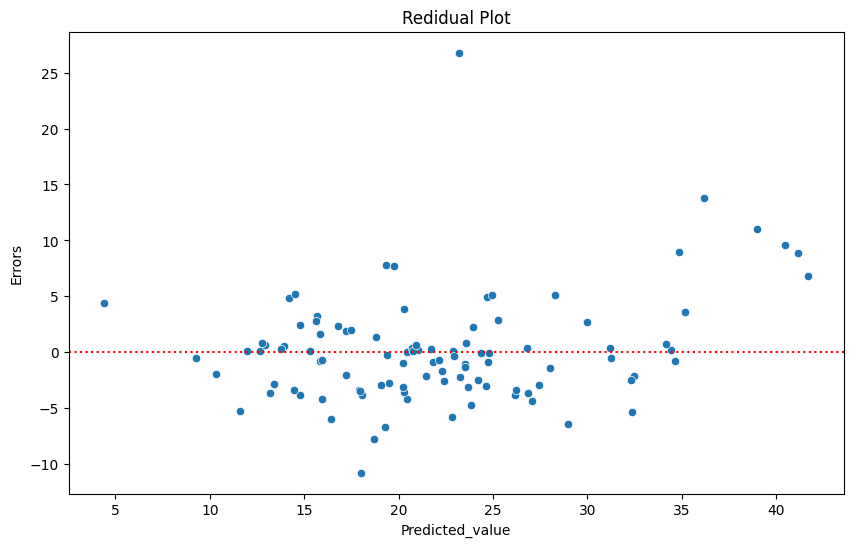

In [38]:
from matplotlib.lines import lineStyles
error = y_test - y_pred

plt.figure(figsize = (10,6))
sns.scatterplot(x= y_pred, y = error)
plt.axhline(y=0, color = 'red', linestyle = ':')
plt.xlabel('Predicted_value')
plt.ylabel('Errors')
plt.title('Redidual Plot')
plt.show()


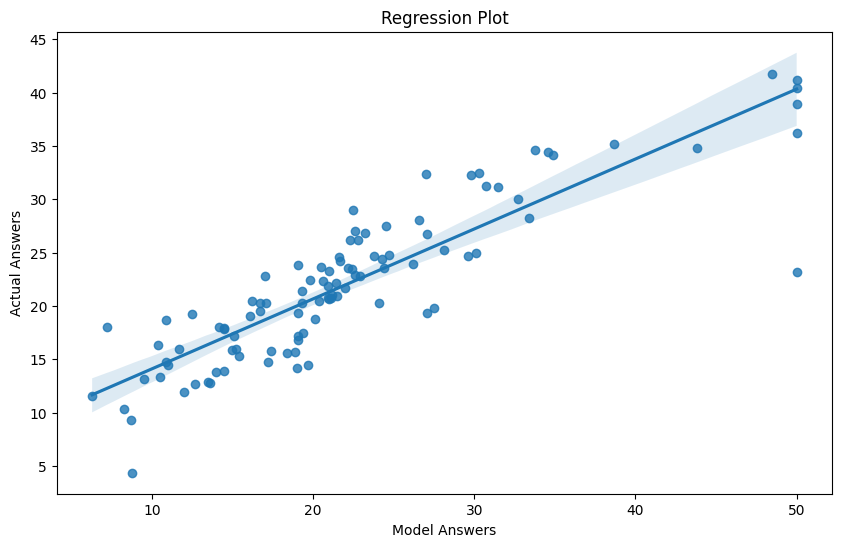

In [39]:
plt.figure(figsize = (10,6))
sns.regplot(x = y_test, y = y_pred)
plt.title("Regression Plot")
plt.xlabel('Model Answers')
plt.ylabel('Actual Answers')
plt.show()

# **Conclusion**::

* **Model Goal**: Developed a Linear Regression model to predict **Boston housing prices** (medv).

* **Strong Performance**: Achieved a **75.55% R-squared score** on unseen test data, meaning the model explains over three-quarters of the variation in housing prices

* **Prediction Accuracy**: The model has a **Root Mean Squared Error (RMSE) of 4.86**, indicating predictions are, on average, within $4,860 of the actual home values.

* **Balanced Model**: Demonstrated **consistent performance** on both training and test data, suggesting it's neither overfitted nor underfitted and generalizes well.

* **Reliable Assumptions**: Residual plot confirmed **random error** distribution, supporting the model's validity and absence of systematic bias.

* **Future Potential**: Solid foundation for exploring optimization techniques, experimenting with more complex algorithms like Random Forest,